import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
# Clustering

# KMeans

We have explored one category of unsupervised machine learning models: **dimensionality reduction**. 

Now we will move on to another class of unsupervised machine learning models: **clustering algorithms**. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

# 2-Dimensions

Let's imagine we have a dataset with only two columns and I'm interested in its structure.

In [1]:
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


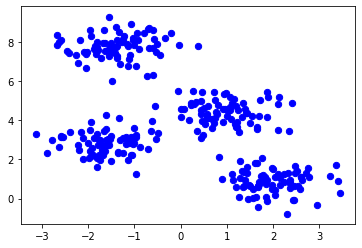

In [2]:
from sklearn.datasets.samples_generator import make_blobs


X, y_true = make_blobs(n_samples=300, centers=4,
                       
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

When I see this picture, I can imagine that there should be a structure on my data that separates these points into 4 groups.

# What are Centroids?

Centroids can be interpreted as the center of mass of each of your groups.

In **KMeans**, you have to specify how many of those groups you expect to encounter via a parameter **n_clusters**.

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

When you fit a **KMeans** algorithm, the main results are stored in **kmeans.cluster_centers_** and **kmeans.labels_**

The **kmeans.labels_** store the predictions for the dataset you've used on the fit (X). You could have also used **kmeans.predict(X)** to obtain the labels 

In [14]:
# the centers will have the dimensions of your original data (in this case, 2-D)
kmeans.cluster_centers_


array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [18]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

In [19]:
# the predicted labels for the data you've trained is stored in kmeans.labels_
kmeans.labels_ 

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

In [20]:
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [24]:
kmeans.cluster_centers_[0]

array([-1.58438467,  2.83081263])

In [21]:
first_center = kmeans.cluster_centers_[0]

In [22]:
x_center1 = first_center[0]
y_center1 = first_center[1]

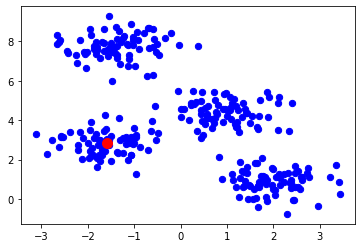

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

plt.scatter(x_center1, y_center1, s=100, c='red')

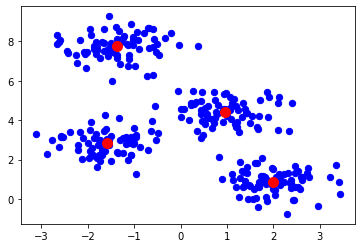

In [26]:
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

# The steps of KMeans

In [27]:
import numpy as np

In [66]:
guess_centers = np.random.random((4,2)) * np.random.randint(low=-10, high=10, size=(4,2))
guess_centers

array([[ 4.8891462 , -4.49089963],
       [ 0.6244873 , -1.23457905],
       [-3.69118031,  0.99016549],
       [ 2.51214594, -1.30055498]])

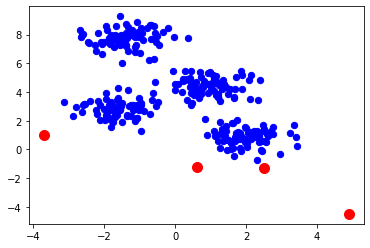

In [69]:
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');
plt.scatter(guess_centers[:,0], guess_centers[:,1], s=100, c='red')

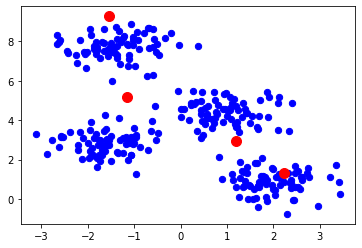

In [74]:
kmeans = KMeans(4, max_iter=1, init=guess_centers, n_init=1).fit(X)
kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

c:\programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


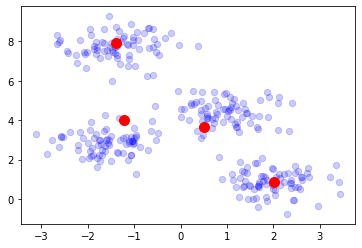

In [78]:
kmeans = KMeans(4, max_iter=2, init=guess_centers).fit(X)
kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue', alpha=0.2);

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

c:\programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


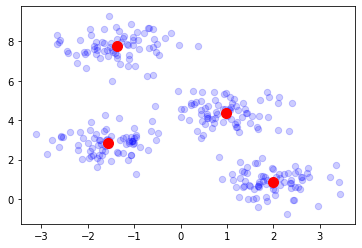

In [79]:
kmeans = KMeans(4, max_iter=3, init=guess_centers).fit(X)
kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue', alpha=0.2);

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

c:\programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


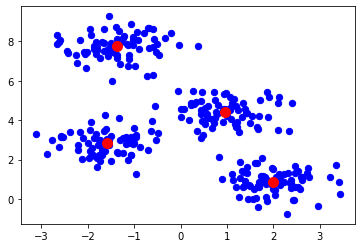

In [80]:
kmeans = KMeans(4, max_iter=4, init=guess_centers).fit(X)
kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

c:\programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


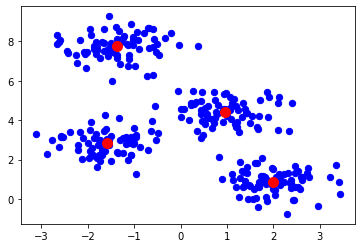

In [81]:
kmeans = KMeans(4, max_iter=50, init=guess_centers).fit(X)
kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [85]:
kmeans.labels_

array([3, 0, 1, 0, 3, 3, 2, 1, 0, 0, 2, 0, 1, 0, 3, 1, 1, 3, 2, 2, 3, 3,
       1, 2, 2, 1, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 1, 1,
       2, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2,
       0, 3, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 3, 1,
       0, 0, 1, 3, 0, 2, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 1, 3, 3, 1, 0, 1,
       2, 2, 3, 0, 3, 1, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2,
       2, 3, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 1, 2, 0,
       3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 1,
       0, 3, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2, 1, 3, 2, 0, 2, 3, 1,
       3, 0, 0, 0, 0, 2, 2, 0, 1, 2, 3, 1, 2, 2, 2, 3, 3, 0, 1, 1, 2, 3,
       0, 2, 1, 0, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 0, 2])

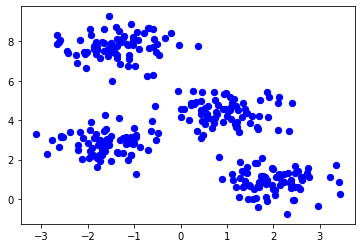

In [86]:
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

# All steps

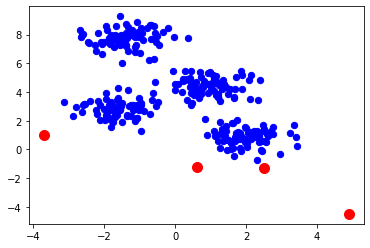

In [87]:
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');
plt.scatter(guess_centers[:,0], guess_centers[:,1], s=100, c='red')

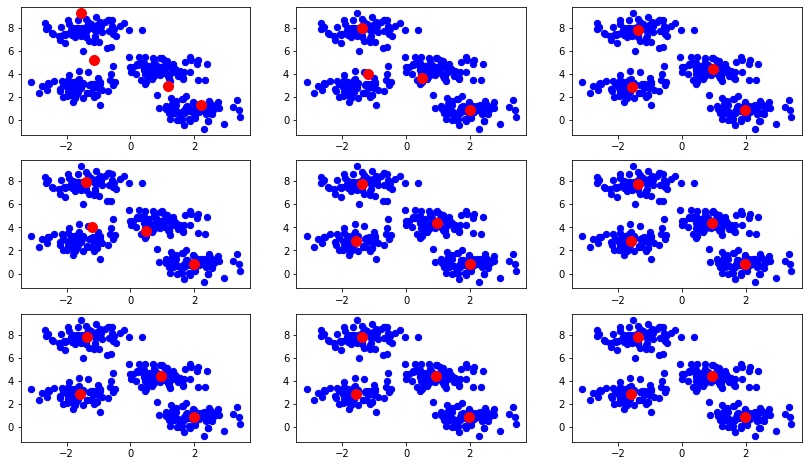

In [88]:
fig, axes = plt.subplots(3,3, figsize=(14,8))

for i in range(3):
    for j in range(3):
    
        n_iterations = i + j + 1
        

        kmeans = KMeans(4, max_iter=n_iterations, init=guess_centers, n_init=1).fit(X)
        kmeans.cluster_centers_
        axes[i,j].scatter(X[:, 0], X[:, 1], s=40, c='blue');
        axes[i,j].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
    

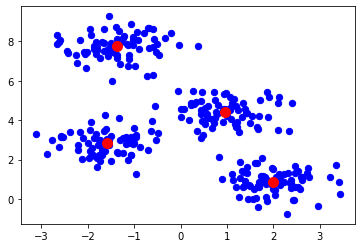

In [89]:
plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

# Visualize each cluster with its label

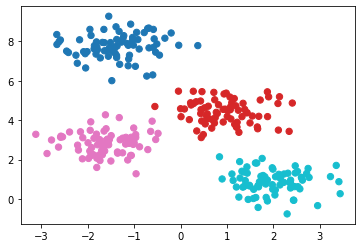

In [91]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans.labels_, cmap='tab10');

# An example case with more dimensions

In [110]:
# load data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer().data
label = load_breast_cancer().target

In [97]:
load_breast_cancer().target_names

array(['malignant', 'benign'], dtype='<U9')

In [100]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [95]:
pd.DataFrame(data, columns=load_breast_cancer().feature_names)

<IPython.core.display.Javascript object>

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

# Standardize Data

In [101]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

In [135]:
kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [136]:
X_std.shape

(569, 30)

In [137]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [138]:
# real labels
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [139]:
# predicted labels
predicted = kmeans.predict(X_std)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [140]:
# use pca to visualize results

from sklearn.decomposition import PCA
pca = PCA(2)
pc = pca.fit_transform(X_std)

Text(0.5, 1.0, 'Predicted')

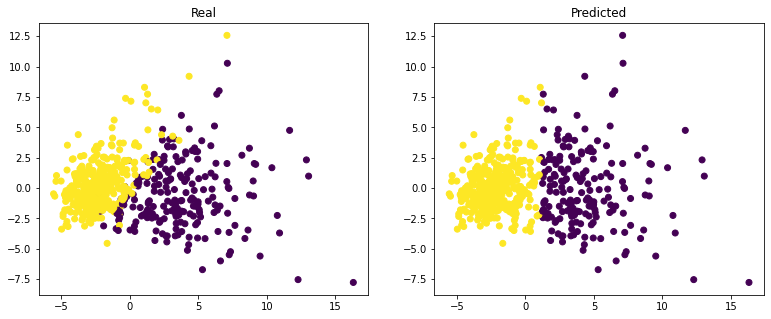

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].scatter(pc[:,0], pc[:, 1], c=label )
ax[1].scatter(pc[:,0], pc[:, 1], c=predicted )

ax[0].set_title('Real')
ax[1].set_title('Predicted')



In [112]:
kmeans.cluster_centers_

array([[-0.48442497, -0.23948977, -0.50066826, -0.47922799, -0.30302374,
        -0.50766196, -0.56671617, -0.57922637, -0.30396101, -0.12545115,
        -0.4270387 , -0.02125791, -0.42787555, -0.40142988, -0.00848542,
        -0.34569618, -0.31677152, -0.38607654, -0.06982168, -0.20642387,
        -0.51730476, -0.25182285, -0.53018015, -0.49893721, -0.3025456 ,
        -0.47291642, -0.51940106, -0.57008917, -0.29713594, -0.30959659],
       [ 0.97397614,  0.48151381,  1.0066346 ,  0.96352718,  0.60925407,
         1.020696  ,  1.13942935,  1.16458212,  0.61113855,  0.25222982,
         0.85859633,  0.04274078,  0.86027888,  0.8071077 ,  0.01706063,
         0.69505052,  0.63689512,  0.77623856,  0.14038222,  0.41503212,
         1.04008365,  0.50631048,  1.06597067,  1.00315418,  0.60829274,
         0.95083725,  1.04429844,  1.14621103,  0.59741617,  0.62246932]])

In [144]:
X = pd.DataFrame(data, columns=load_breast_cancer().feature_names)


<IPython.core.display.Javascript object>

In [147]:
X['cluster'] = kmeans.labels_

In [149]:
# analyze the characteristics of each group
X.groupby('cluster').mean()

mean radius  mean texture  mean perimeter   mean area  \
cluster                                                          
0          17.556614     21.358836      116.407725  993.669841   
1          12.421655     18.260500       79.814000  486.390263   

         mean smoothness  mean compactness  mean concavity  \
cluster                                                      
0               0.104921          0.158199        0.179555   
1               0.092102          0.077554        0.043661   

         mean concave points  mean symmetry  mean fractal dimension  ...  \
cluster                                                              ...   
0                   0.094069       0.197901                0.064577  ...   
1                   0.026463       0.172836                0.061913  ...   

         worst radius  worst texture  worst perimeter   worst area  \
cluster                                                              
0           21.291746      28.786402       143.049048  1451.233862   
1           13.771129      24.130816        89.461474   596.759474   

         worst smoothness  worst compactness  worst concavity  \
cluster                                                         
0                0.146245           0.403735         0.489863   
1                0.125467           0.179923         0.163924   

         worst concave points  worst symmetry  worst fractal dimension  
cluster                                                                 
0                    0.189883        0.327004                 0.095179  
1                    0.077166        0.271709                 0.078359  

[2 rows x 30 columns]